In [1]:
from skimage.draw import polygon
import numpy as np
import tifffile
import geojson
import re
from itertools import tee

In [2]:
with open("../anno.txt","r") as f:
    annostr = f.read()

In [3]:
annostr.split(".tif")[2]

'\n[\n  {\n    "type": "Feature",\n    "id": "PathAnnotationObject",\n    "geometry": {\n      "type": "Polygon",\n      "coordinates": [\n        [\n          [339.19, 869.43],\n          [337.04, 870.51],\n          [335.97, 871.58],\n          [334.89, 872.65],\n          [333.82, 872.65],\n          [333.82, 873.73],\n          [331.67, 876.95],\n          [326.31, 881.24],\n          [320.94, 887.68],\n          [318.79, 889.83],\n          [316.65, 893.05],\n          [313.43, 895.19],\n          [311.28, 896.27],\n          [310.21, 898.42],\n          [306.99, 899.49],\n          [305.91, 899.49],\n          [304.84, 900.56],\n          [303.77, 900.56],\n          [303.77, 901.64],\n          [302.69, 901.64],\n          [301.62, 902.71],\n          [301.62, 903.78],\n          [300.55, 904.86],\n          [299.47, 905.93],\n          [299.47, 907],\n          [294.1, 915.59],\n          [294.1, 917.74],\n          [293.03, 919.88],\n          [291.96, 920.96],\n          [291

In [4]:

m =re.search(r".+\.tif\n", annostr, re.MULTILINE)

In [5]:
m.span()

(0, 28)

In [6]:
annostr[28:]


'[\n  {\n    "type": "Feature",\n    "id": "PathAnnotationObject",\n    "geometry": {\n      "type": "Polygon",\n      "coordinates": [\n        [\n          [413.25, 696.62],\n          [411.1, 697.69],\n          [406.81, 697.69],\n          [405.74, 698.77],\n          [403.59, 698.77],\n          [401.44, 701.99],\n          [400.37, 701.99],\n          [398.22, 704.13],\n          [398.22, 705.21],\n          [395, 707.35],\n          [392.86, 709.5],\n          [391.78, 710.57],\n          [387.49, 714.87],\n          [386.42, 714.87],\n          [384.27, 717.01],\n          [382.12, 718.09],\n          [381.05, 719.16],\n          [379.97, 720.23],\n          [377.83, 721.31],\n          [348.85, 721.31],\n          [347.77, 722.38],\n          [343.48, 722.38],\n          [340.26, 723.45],\n          [334.89, 725.6],\n          [333.82, 726.68],\n          [331.67, 727.75],\n          [330.6, 727.75],\n          [328.45, 728.82],\n          [326.31, 728.82],\n          [324.16,

In [7]:
iter = re.finditer(r".+\.tif\n", annostr)
indices = [m.span() for m in iter]
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [8]:
indices

[(0, 28), (19082, 19111), (41385, 41414), (49447, 49476)]

In [9]:
names = []
jsons = []
for a,b in pairwise(indices):
    names.append(annostr[a[0]:a[1]-1])
    jsons.append(annostr[a[1]:b[0]])

In [10]:
tmp = geojson.loads(jsons[0])

In [11]:
len(tmp)

2

In [12]:
tmp[0].keys()

dict_keys(['type', 'id', 'geometry', 'properties'])

In [13]:
tmp[0].type

'Feature'

In [14]:
tmp[0].geometry.keys()

dict_keys(['type', 'coordinates'])

In [15]:
tmp[0].geometry.type

'Polygon'

In [16]:
tmp[0].geometry.coordinates

[[[413.25, 696.62],
  [411.1, 697.69],
  [406.81, 697.69],
  [405.74, 698.77],
  [403.59, 698.77],
  [401.44, 701.99],
  [400.37, 701.99],
  [398.22, 704.13],
  [398.22, 705.21],
  [395, 707.35],
  [392.86, 709.5],
  [391.78, 710.57],
  [387.49, 714.87],
  [386.42, 714.87],
  [384.27, 717.01],
  [382.12, 718.09],
  [381.05, 719.16],
  [379.97, 720.23],
  [377.83, 721.31],
  [348.85, 721.31],
  [347.77, 722.38],
  [343.48, 722.38],
  [340.26, 723.45],
  [334.89, 725.6],
  [333.82, 726.68],
  [331.67, 727.75],
  [330.6, 727.75],
  [328.45, 728.82],
  [326.31, 728.82],
  [324.16, 729.9],
  [322.01, 732.04],
  [317.72, 732.04],
  [314.5, 733.12],
  [312.35, 735.26],
  [311.28, 735.26],
  [308.06, 736.34],
  [306.99, 736.34],
  [305.91, 737.41],
  [304.84, 737.41],
  [303.77, 739.56],
  [302.69, 739.56],
  [301.62, 740.63],
  [300.55, 742.78],
  [299.47, 744.92],
  [298.4, 746],
  [297.32, 747.07],
  [296.25, 748.14],
  [295.18, 750.29],
  [294.1, 751.36],
  [291.96, 752.44],
  [290.88, 752

In [17]:
polygon_numpy = np.array(tmp[0].geometry.coordinates)

In [18]:
im = tifffile.imread("../"+names[0])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

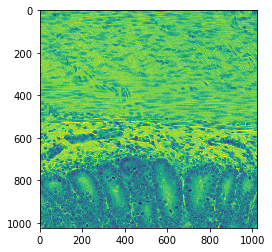

In [20]:
plt.imshow(im[...,0])

In [21]:
im.shape

(1024, 1024, 3)

In [22]:
polygon_numpy.shape

(1, 403, 2)

In [23]:
p = polygon_numpy.squeeze()
p.shape

(403, 2)

In [24]:
r, c = polygon(p[:,1],p[:,0])

In [25]:
im[r,c] = 0

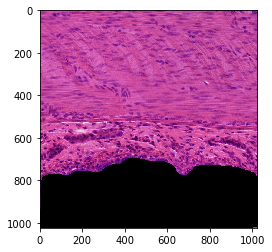

In [26]:
plt.imshow(im)